<a href="https://colab.research.google.com/github/Acengstuff/MyStuff/blob/main/FeatureEngineering(SMOTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

In [11]:
import numpy as np
import pandas as pd
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 16)])
df['Target'] = y

# Suppose we have some categorical features (simulation of categorical features)
df['Feature_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['Feature_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,Z,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,A,Y,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,A,X,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,C,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,A,X,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,A,Z,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Z,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Y,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,B,Z,-0.128774,0.800834,0


In [7]:
from collections import Counter
import numpy as np
import pandas as pd

X = df.drop('Target', axis=1)
y = df['Target']
print("Class Distribution before SMOTE:", Counter(y))

Class Distribution before SMOTE: Counter({0: 901, 1: 99})


In [8]:
#Embedded Methods
#Using Random Forest to get Important Feature
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Feature_12', 'Feature_13'], axis=1)
rf_model.fit(X_integer, y)

#Getting Important Feature
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

#determining threshold for important Feature
threshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

#Show Important Feature with and its value
print("The Choosen Feature using Embedded Methods (above threshold):")
for i in important_features_indices:
  # If the original X is a DataFrame, then we take the column name
  print(f"{X.columns[i]}: {importances[i]}")

# Get important column names based on importance
important_features = X_integer.columns[important_features_indices]

# Move Important Feature to the new Var
X_important = X_integer[important_features] #just important feature from training data
print("\nTraining Data Dimension with Important Feature:", X_important.shape)

The Choosen Feature using Embedded Methods (above threshold):
Feature_2: 0.11860019897866206
Feature_3: 0.06878603593465271
Feature_5: 0.07731131335837178
Feature_8: 0.050482655781999855
Feature_9: 0.2625049418105367
Feature_10: 0.08958259568334655
Feature_11: 0.06365230544114515
Feature_13: 0.12578161860669113

Training Data Dimension with Important Feature: (1000, 8)


In [10]:
# combine numerical and categorical data as before.
X_Selected = pd.concat([X_important, X['Feature_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['Feature_13']], axis=1)
X_Selected

,Feature_2,Feature_3,Feature_5,Feature_8,Feature_9,Feature_10,Feature_11,Feature_15,Feature_12,Feature_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,X
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,C,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,C,X
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,C,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,Z
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,C,X
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,A,Z
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,C,Y
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,A,Y


In [14]:
# Label Encoding for Categorical type Feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding for feature 12
X_Selected['Feature_12'] = label_encoder.fit_transform(X_Selected['Feature_12'])

# Encoding for feature 13
X_Selected['Feature_13'] = label_encoder.fit_transform(X_Selected['Feature_13'])

print(X_Selected)

     Feature_2  Feature_3  Feature_5  Feature_8  Feature_9  Feature_10  \
0    -3.472520  -1.314199   0.642138   1.146301  -2.173112    2.765828   
1    -1.770842  -1.578851  -2.025230  -3.958705  -0.598147    1.018789   
2    -2.051770   3.631998   1.674093   0.031633  -1.140149    2.069694   
3    -1.608657  -0.735184  -1.753532  -2.897416  -0.830328    1.572469   
4    -2.362885  -3.909120  -4.029843  -3.435229  -2.142380    2.332385   
..         ...        ...        ...        ...        ...         ...   
995  -0.017325   4.884411   3.033376   1.278882  -1.293396    1.772169   
996  -1.690916   5.949207   2.238469  -1.436622  -2.153011   -0.867583   
997  -1.263417  -1.331925   1.777577  -1.846263   1.753033    1.858452   
998  -0.975838   0.279144  -0.443749  -1.017319  -0.643070    2.142898   
999   1.387667  -5.554578  -2.834755  -1.932864   2.625895    0.246120   

     Feature_11  Feature_15  Feature_12  Feature_13  
0     -1.821258   -0.276558           0           0  
1  

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choosing Numeric Column
numeric_columns = X_Selected.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Feature_12', 'Feature_13'])

# Make some data copy
X_cleaned = X_important.copy()

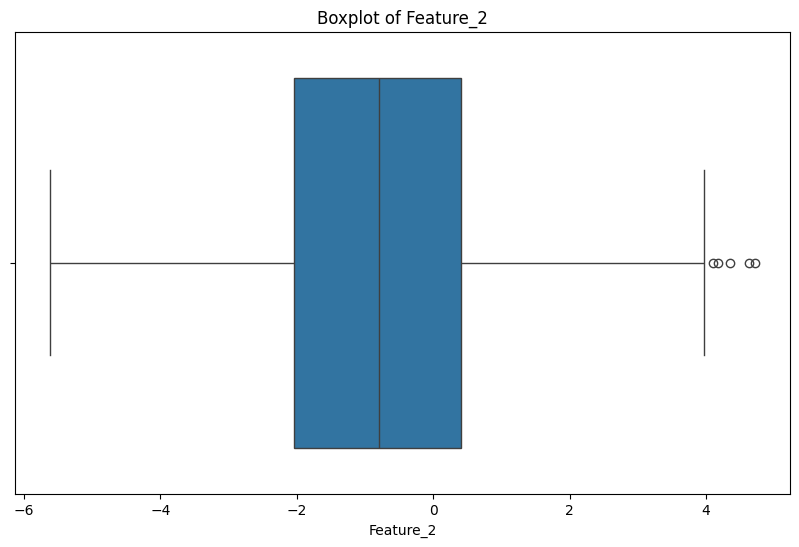

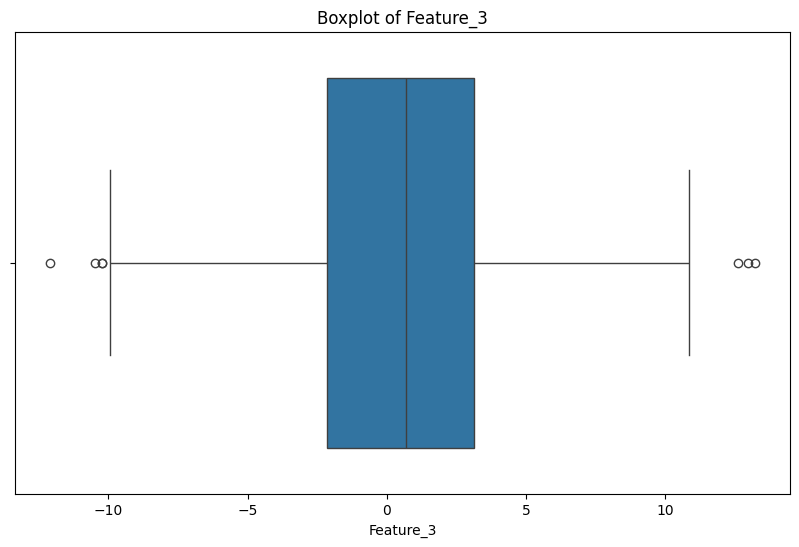

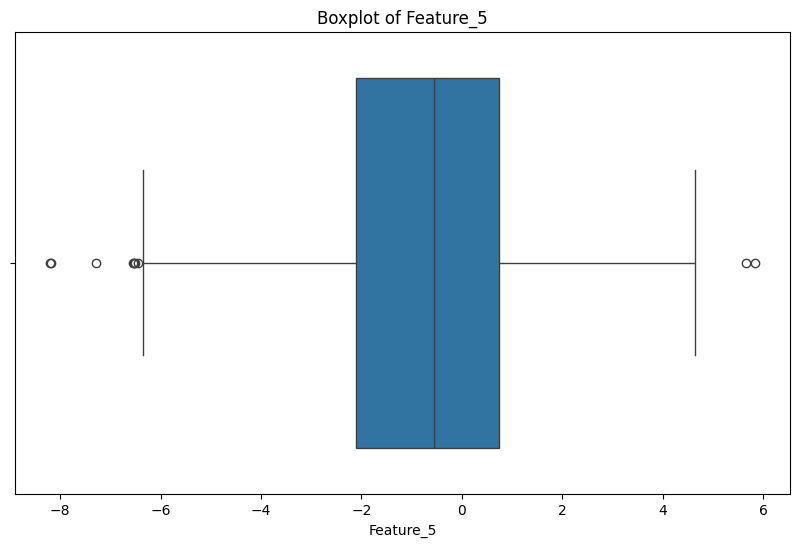

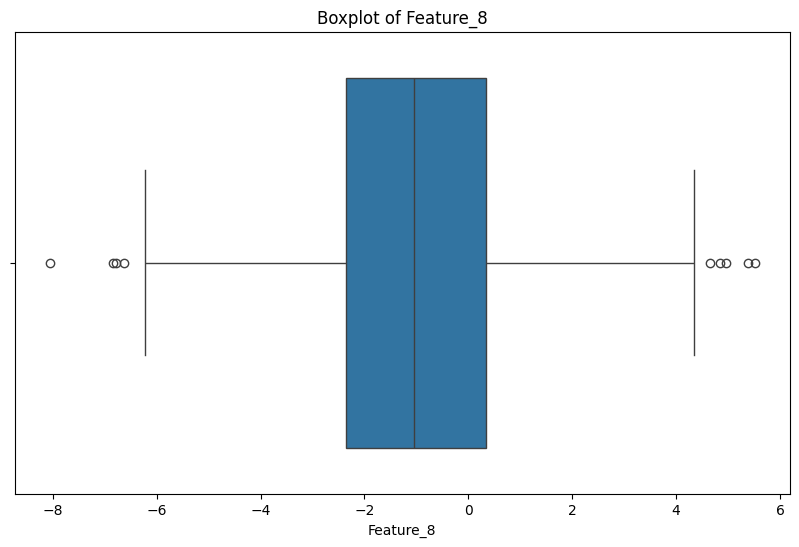

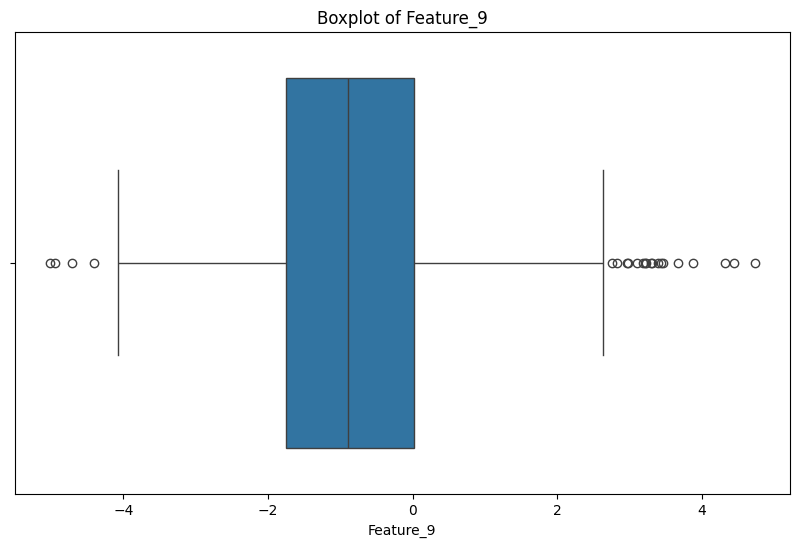

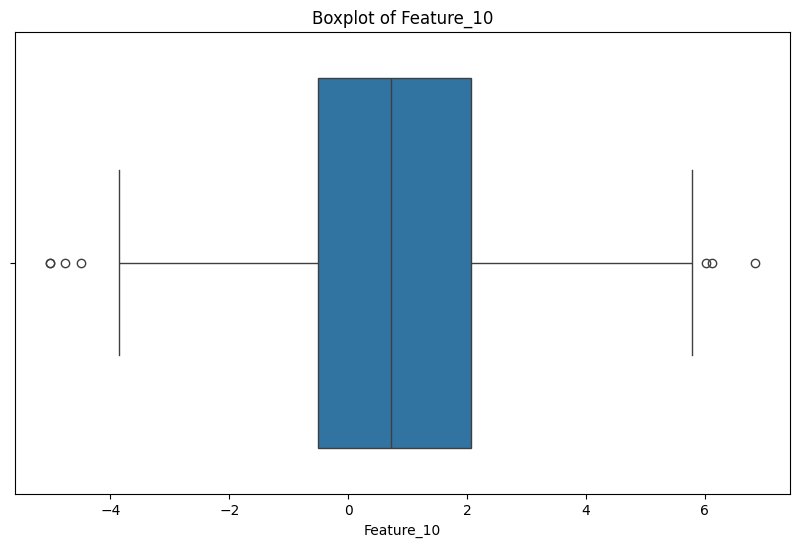

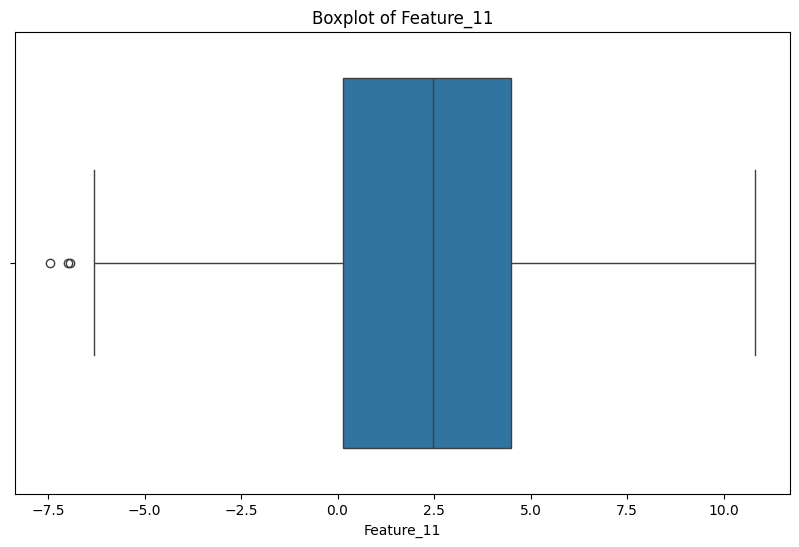

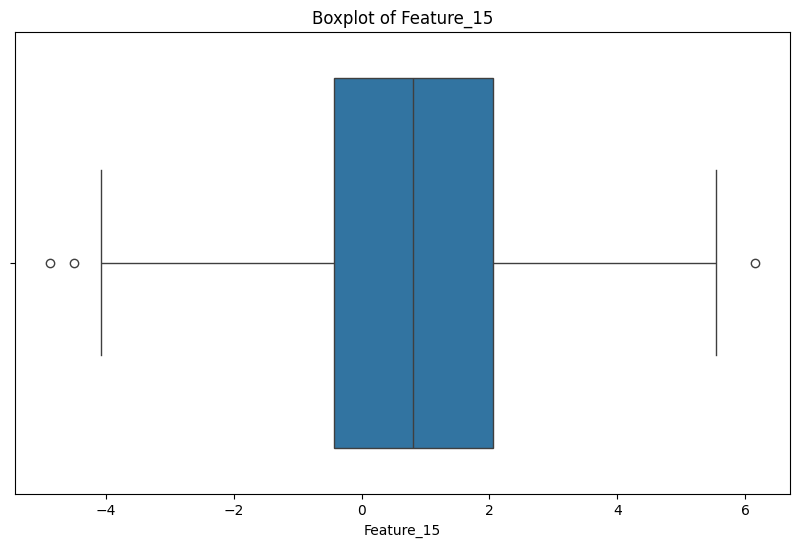

In [17]:
for feature in X_cleaned.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=X_cleaned[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show

In [18]:
for col in numeric_columns:
    # look for outlier with IQR (Interquartile Range)
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # identify outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]

    # deleting outlier from DataFrame
    X_cleaned = X_cleaned.drop(outliers.index)

In [19]:
X_cleaned

,Feature_2,Feature_3,Feature_5,Feature_8,Feature_9,Feature_10,Feature_11,Feature_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [23]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Filter the target variable 'y' to match the indices of X_cleaned
y_cleaned = y[X_cleaned.index] # This line is added to fix the issue

# Perform oversampling on the dataset
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

# Display the class distribution after SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Convert results into a DataFrame for visualisation or further analysis
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE: Counter({0: 875, 1: 875})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


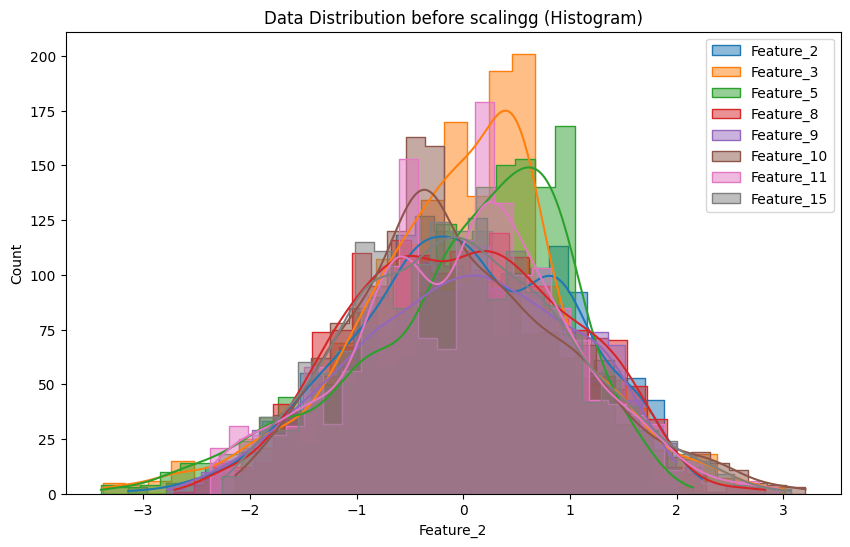

In [27]:
# Visualisation of data distribution before scaling using histogram
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Data Distribution before scaling (Histogram)')
plt.legend()
plt.show()

In [26]:
# Scaling: Standardise numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# perform scaling to the important feature
X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

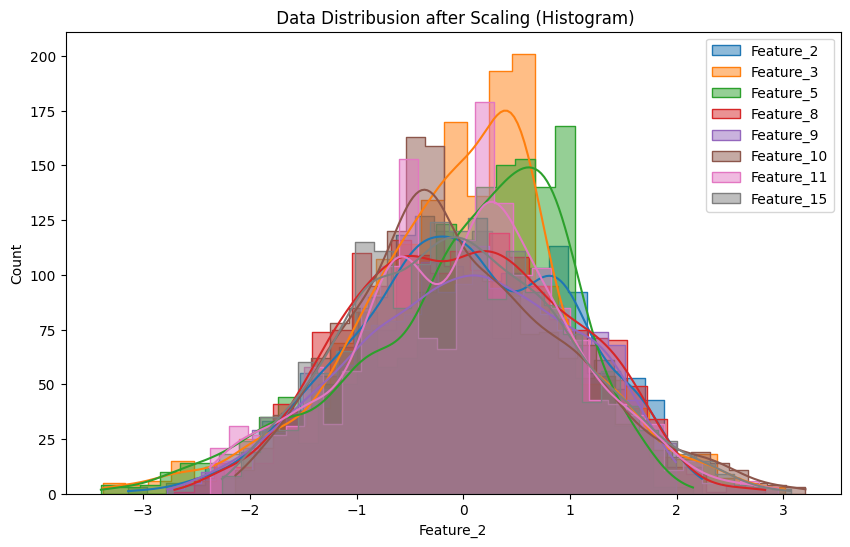

In [31]:
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title(' Data Distribusion after Scaling (Histogram)')
plt.legend()
plt.show()

In [32]:
X_resampled.describe(include='all')

,Feature_2,Feature_3,Feature_5,Feature_8,Feature_9,Feature_10,Feature_11,Feature_15
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-2.436147e-17,3.248195e-17,-4.060244e-18,3.248195e-17,0.000000,9.744586e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160e+00,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-5.875147e-01,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,1.916188e-01,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,7.374792e-01,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233e+00,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00
